# Chapter 6- Supervised ML

Dealing with solving problems for which we have the target labels available to train the model.

## Load the dataset

The Wine Quality dataset sourced from the UCI Machine Learning Repository encompasses data on wines, specifically, the physicochemical properties of red and white variants of wine. The dataset consists of 12 variables, inclusive of quality — the target variable

In [2]:
import pandas as pd

# Load the red wine quality dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(red_wine_url, sep=';')
print("Red Wine Dataset:")
print(red_wine.head())
print("\nShape:", red_wine.shape)

# Load the white wine quality dataset
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine = pd.read_csv(white_wine_url, sep=';')
print("\nWhite Wine Dataset:")
print(white_wine.head())
print("\nShape:", white_wine.shape)


Red Wine Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

## EDA

In [3]:
# Check Red Wine Dataset data types
print("Red Wine Dataset Data Types:")
print(red_wine.dtypes)

# Check White Wine Dataset data types
print("\nWhite Wine Dataset Data Types:")
print(white_wine.dtypes)

Red Wine Dataset Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

White Wine Dataset Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
# Describing Red Wine Dataset
print("Red Wine Dataset Description:")
print(red_wine.describe())

# Describing White Wine Dataset
print("\nWhite Wine Dataset Description:")
print(white_wine.describe())

Red Wine Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000

In [5]:
# Unique values
print("\nUnique values in Red Wine Dataset:")
print(red_wine.nunique())

# Unique values
print("\nUnique values in White Wine Dataset:")
print(white_wine.nunique())


Unique values in Red Wine Dataset:
fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values in White Wine Dataset:
fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [6]:
# Check missing values in Red Wine Dataset
print("Missing values in Red Wine Dataset:")
print(red_wine.isnull().sum()) # There are no null values in all columns


# Check missing values in White Wine Dataset
print("\nMissing values in White Wine Dataset:")
print(white_wine.isnull().sum()) # There are no null values in all columns

Missing values in Red Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in White Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


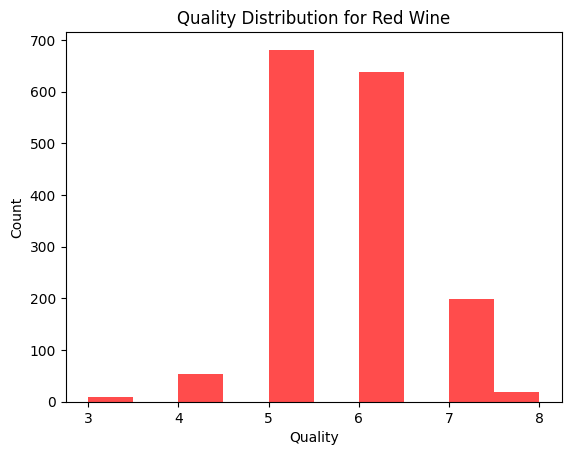

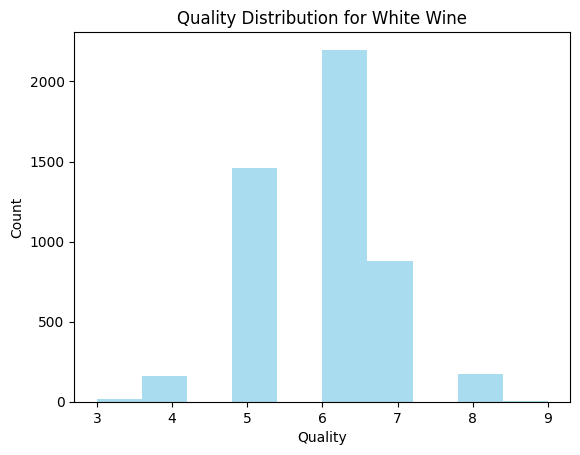

In [7]:
import matplotlib.pyplot as plt

# Plot for Red Wine
plt.hist(red_wine.quality, bins=10, color='red', alpha=0.7)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution for Red Wine')
plt.show()

# Plot for White Wine
plt.hist(white_wine.quality, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution for White Wine')
plt.show()

# Gradient Descent

Gradient Descent is a cornerstone of optimization in machine learning and deep learning. Its function enables the machine learning model to 'learn,' thereby improving itself based on its past performance.

In machine learning, Gradient Descent can be visualized as a careful navigation downwards until we find the valley between hills. The 'hill' in this context is the cost function, which quantifies our model's error. Through a series of small steps, Gradient Descent refines the cost function by 'walking' down the hill towards the steepest descent until it reaches the lowest possible point at its optimal state.

At its core, Gradient Descent relies on two key mathematical mechanisms: **the Cost Function and the Learning Rate**. The Cost Function (or Loss Function) quantifies the disparity between predicted and expected values, presenting it as a single float number. The Learning Rate, symbolized by α, dictates the size of the steps we take downhill. A lower value of α results in smaller, more precise steps, while a high value could cause drastic, potentially unstable steps.

From our previous analogy, imagine the hill is symbolized by a function of position, g(x). Starting at the hill's pinnacle (x0​), we revise our position (x) by moving a step proportional to the negative gradient at that location. The gradient g′(x) is simply the derivative of g(x), pointing toward the steepest ascent. Conversely, −g′(x) signifies the fastest descending path. We repeat this stepping process until the gradient becomes zero at the minimum point, indicating no further downhill path, i.e., no additional optimization is required.

In [11]:
# implementing gradient descent
def gradient_descent(x, y, theta, alpha, iterations):
    """
    x -- input dataset
    y -- target dataset
    theta -- initial parameters
    alpha -- learning rate
    iterations -- the number of times to execute the algorithm
    """

    m = y.size # number of data points
    cost_list = [] # list to store the cost function value at each iteration
    theta_list = [theta] # list to store the values of theta at each iteration
    
    for i in range(iterations):
        # calculate our prediction based on our current theta
        prediction = np.dot(x, theta)
        
        # compute the error between our prediction and the actual values
        error = prediction - y
        
        # calculate the cost function
        cost = 1 / (2*m) * np.dot(error.T, error)
        
        # append the cost to the cost_list
        cost_list.append(np.squeeze(cost))
        
        # calculate the gradient descent and update the theta
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        
        # append the updated theta to the theta_list
        theta_list.append(theta)
    
    # return the final values of theta, list of all theta, and list of all costs, respectively 
    return theta, theta_list, cost_list

Let's focus on one feature for simplicity's sake: alcohol. We will use Python to demonstrate how Gradient Descent can design a model that predicts wine quality based on its alcohol content.

[array(16.30831099), array(15.95933612), array(15.61796191), array(15.2840228), array(14.95735687), array(14.63780571), array(14.32521435), array(14.01943121), array(13.72030801), array(13.4276997), array(13.14146437), array(12.86146324), array(12.58756051), array(12.31962337), array(12.05752189), array(11.80112896), array(11.55032025), array(11.30497414), array(11.06497166), array(10.83019642), array(10.60053456), array(10.37587473), array(10.15610798), array(9.94112773), array(9.73082974), array(9.52511203), array(9.32387484), array(9.12702058), array(8.9344538), array(8.74608111), array(8.56181116), array(8.38155461), array(8.20522403), array(8.03273392), array(7.86400064), array(7.69894235), array(7.53747903), array(7.37953237), array(7.22502578), array(7.07388433), array(6.92603473), array(6.78140529), array(6.63992587), array(6.50152786), array(6.36614416), array(6.2337091), array(6.10415847), array(5.97742945), array(5.85346058), array(5.73219174), array(5.61356413), array(5.497

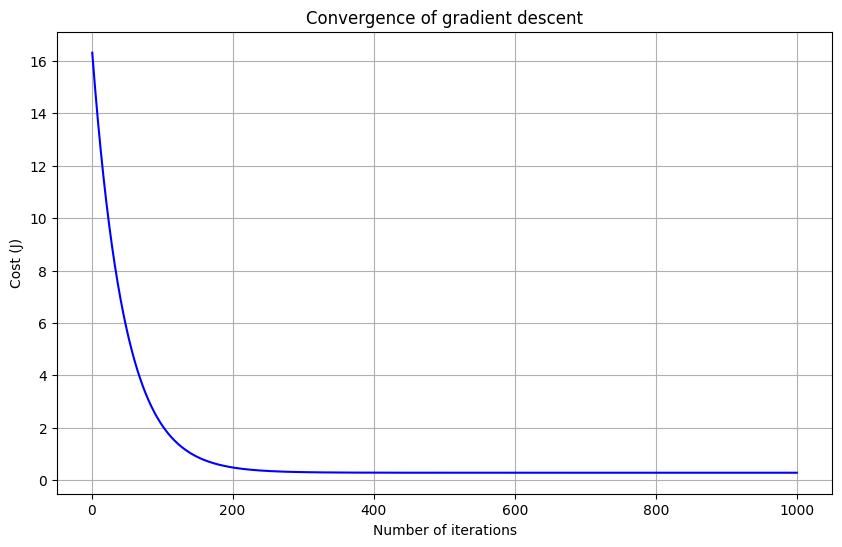

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

# Only consider the 'alcohol' column as a predictive feature for now
x = pd.DataFrame(red_wine['alcohol'])
y = red_wine['quality']

# Splitting datasets into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# We set our parameters to start at 0
theta = np.zeros(x_train.shape[1]).reshape(-1, 1)

# Define the number of iterations and alpha value
alpha = 0.0001
iters = 1000

# Applying Gradient Descent
y_train = np.array(y_train).reshape(-1, 1)
g, theta_list, cost_list = gradient_descent(x_train, y_train, theta, alpha, iters)

print(cost_list)

plt.figure(figsize=(10, 6))
plt.plot(range(1, iters + 1), cost_list, color='blue')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

# Linear Regression

Linear Regression is fundamental to supervised learning. It becomes particularly useful when the target or outcome variable is continuous. Here we will predict the quality of the wine (a numerical score from 0 to 10, which is continuous) based on several physicochemical properties, such as fixed acidity, volatile acidity, and citric acid, using our dataset.

Linear Regression algorithm optimizes a straight line to encapsulate the relationship accurately between the input and output variables. This line is modeled using a simple equation, y=mx+c, where y is the dependent variable, m is the slope, x is the independent variable, and c is the y-intercept.

At the heart of Linear Regression lies the concept of the cost function and hypothesis.
1. Hypothesis: The hypothesis is represented as $h_{θ}$(x)=$θ_{0}$+$θ_{1}x$ , where $θ_{0}$​ and $θ_{1}$ are the model's parameters that we will adjust using gradient descent to minimize the cost function.
2. Cost Function (or Loss Function): It's also known as the Mean Squared Error (MSE) and it's given by J(θ)= $\frac{1}{2m}$ $\sum_{i=1}^{m}$ $(Prediction - Actual)^{2}$ where m is the total count of observations and the summation over the squared differences (errors) ensures that the higher the error, the greater the cost.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

# Select features and target variable
features = red_wine.drop('quality', axis=1)
target = red_wine['quality']

# Split the dataset into a training set and a testing set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = LinearRegression()
model.fit(features_train, target_train)

# Predict the test features
predictions = model.predict(features_test)

# Evaluate the model using MSE
mse = metrics.mean_squared_error(target_test, predictions)
print('Mean Squared Error:', mse) # Mean Squared Error: 0.39002514396395416

Mean Squared Error: 0.39002514396395416


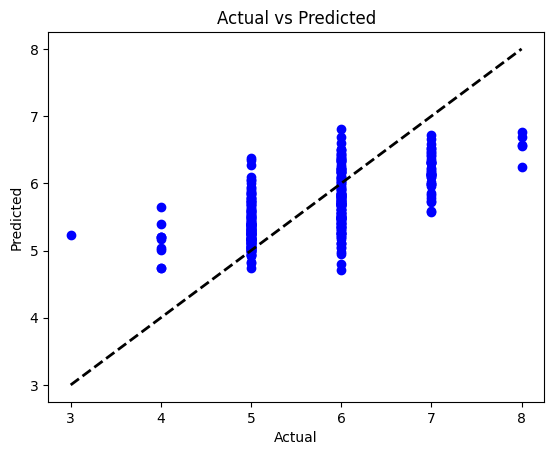

In [14]:
import matplotlib.pyplot as plt

# Plot target vs prediction
plt.scatter(target_test, predictions, color='blue')
# Plot the ideal prediction line (with zero error)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

It's crucial to check the model's performance by examining the residuals, simply the difference between the actual and predicted values. The smaller the residuals, the better the model performs. We'll look at two key metrics here:

1- Mean Squared Error (MSE): The average of the squared errors, with larger errors contributing more due to the squaring. This is the cost function we discussed earlier.

2- Coefficient of Determination (R-squared): This measures the degree of variation in the target variable that our model could predict. It ranges between 0 and 1, with a higher value representing a higher quality of our model.


In [ ]:
# Evaluate the model using R-squared
r2_score = metrics.r2_score(target_test, predictions)
print('R-squared:', r2_score) # R-squared: 0.4031803412796231

R-squared: 0.4031803412796231


## Evaluating the performance of a Linear Regression model

1. Mean Squared Error (MSE): This metric quantifies the average of the squares of prediction errors, which are the differences between the actual and predicted values. The lower the MSE, the better the model performed.

2. Root Mean Squared Error (RMSE): This metric is merely the square root of the MSE. It carries the same units as the output and is often preferred as it punishes larger errors more robustly.

3. Mean Absolute Error (MAE): As the name implies, MAE measures the average of the absolute differences between our actual and predicted values. This metric is particularly helpful when we wish to know exactly how much our predictions deviate on average.

4. R-squared: This coefficient of determination, known as R-squared, quantifies the proportion of the total variability or variance of the target variable that can be accounted for by our regression model. Higher R-squared values indicate smaller differences between observed and predicted response values.


In [19]:
from sklearn import metrics
import numpy as np

# In our example, fitted is a numpy array that our linear regression model predicted for wine quality
fitted = np.array([3.6, 2.7, 2.4]) 

# While actual is a numpy array containing the real wine qualities
actual = np.array([3.5, 2.9, 2.6]) 

# For calculating MAE, pass the actual and predicted arrays to mean_absolute_error()
mae = metrics.mean_absolute_error(actual, fitted)
print(f"Mean Absolute Error (MAE): {mae}")
# Mean Absolute Error (MAE): 0.16666666666666666

# For calculating MSE, use the mean_squared_error function
mse = metrics.mean_squared_error(actual, fitted)
print(f"Mean Squared Error (MSE): {mse}")
# Mean Squared Error (MSE): 0.029999999999999995

# RMSE is calculated as the square root of MSE, using the np.sqrt() function
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Root Mean Squared Error (RMSE): 0.1732050807568877

# For calculating the R-squared value, use the r2_score function
r2 = metrics.r2_score(actual, fitted)
print(f"R-squared: {r2}")
# R-squared: 0.7857142857142857

Mean Absolute Error (MAE): 0.16666666666666666
Mean Squared Error (MSE): 0.029999999999999995
Root Mean Squared Error (RMSE): 0.1732050807568877
R-squared: 0.7857142857142857


# Logistic Regression

Our goal is to predict wine quality, which, as you may remember, ranges from 0 to 10. To keep things simple and focus on a **binary classification problem**, let's classify the wines as good (a quality rating of 7 or above) and not good (a quality rating below 7). Therefore, we will be using Logistic Regression to predict whether the quality of a specific type of wine is 'good' or 'not good' based on its physicochemical features.

In Logistic Regression, all of this is achieved by using a logistic function, which limits the unlimited outcome of the linear equation to a **number between 0 and 1** (representing probability). Also known as the **Sigmoid function**, this logistic function is an S-shaped curve that maps any real-valued number into a value falling within these bounds. The function is defined as follows,
f(x)=$\frac{1}{1+e^{-x}}$​

In this equation, x represents the output of a linear combination of feature values and their corresponding coefficients,
x=$β_{0}+β_{1}X_{1}+β_{2}X_{2}+...+β_{n}X_{n}$

Once we compute the predicted probability (p) using the Sigmoid function, we can assign classes by **defining a threshold** (which is generally 0.5):

- If p≥0.5, the label for the example is 1 (or Good in our case).
- If p<0.5, the label for the example is 0 (or Not Good in our case).

The next component in Logistic Regression is the **cost function**. In Logistic Regression, the cost function is defined as:

<img src="./images/logistic_regression_cost_fn.png" alt="Logistic Regression Cost Fn" style="width:800px;height:300px;">

While discussing the cost function, it's crucial to consider optimization algorithms like **Gradient Descent** used to find the parameters θ to minimize this cost.

In [16]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# Convert the multi-class problem to a binary one
red_wine['quality'] = red_wine['quality'].apply(lambda x : 1 if x >= 7 else 0)

# Split the dataset into features and target variable
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Logistic Regression object
lr = LogisticRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Print the learned parameters
print(lr.coef_, lr.intercept_)

[[-0.02428931 -3.25282455 -0.05460797  0.07645871 -1.27201513  0.02173631
  -0.01862357 -1.0434218  -2.50361787  2.00691824  0.92563336]] [-1.7897334]


/Users/amnagul/.pyenv/versions/jupybook_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Make predictions on the test dataset
y_pred = lr.predict(X_test)

# Import metrics module for accuracy calculation
from sklearn import metrics

# Model accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# Accuracy:  0.8875

Accuracy:  0.8875


## Evaluating the performance of a Logistic Regression model

Evaluating the performance of a model is crucial to assess its usability and reliability. We evaluate our Logistic Regression model's performance using several important metrics. Let's define a few key metrics:

1. Confusion Matrix: This table describes the performance of a classification model. It's essentially a 2×22×2 matrix that visualizes the performance of the regression, representing actual and predicted classifications in terms of true positives, false positives, true negatives, and false negatives.

2. Accuracy: This is the ratio of correctly predicted observations to total observations. Accuracy = (True Positives + True Negatives) / Total Observations.

3. Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. Precision = True Positives / (True Positives + False Positives).

4. Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all observations in the actual class. Recall = True Positives / (True Positives + False Negatives).

5. F1 Score: This is the weighted average of Precision and recall. F1Score = 2 * Recall * Precision / (Recall + Precision).

6. ROC-AUC : This is the area under the Receiver Operating Characteristic curve. It indicates how much the model can distinguish between classes.


In [18]:
from sklearn import metrics

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
# Accuracy:  0.8875

# Model Precision
print("Precision: ", metrics.precision_score(y_test, y_pred))
# Precision:  0.5172413793103449

# Model Recall
print("Recall: ", metrics.recall_score(y_test, y_pred))
# Recall:  0.2727272727272727

# Model F1-Score
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
# F1 Score:  0.3571428571428571

# Model AUC
print("AUC: ", metrics.roc_auc_score(y_test, y_pred))
# AUC:  0.6198930481283422

Accuracy:  0.8875
Precision:  0.5172413793103449
Recall:  0.2727272727272727
F1 Score:  0.35714285714285715
AUC:  0.6198930481283422


In [20]:
from sklearn import metrics

# Let y_test be a numpy array with the actual wine quality classes ('good' or 'not good') for the test dataset
y_test = np.array(['not good', 'good', 'good', 'not good', 'good'])

# And let pred be a numpy array with the predicted classes by our model for the test dataset
pred = np.array(['not good', 'good', 'not good', 'good', 'good'])

# For calculating Accuracy
accuracy = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

# For calculating Precision, use the precision_score function
# Note: It considers 'good' as the positive class by default (this can be changed using the pos_label parameter)
precision = metrics.precision_score(y_test, pred, pos_label="good")
print(f"Precision: {precision}")

# For calculating Recall
recall = metrics.recall_score(y_test, pred, pos_label="good")
print(f"Recall: {recall}")

# For calculating F1 Score
f1 = metrics.f1_score(y_test, pred, pos_label="good")
print(f"F1 Score: {f1}")

# For computing AUC-ROC, we need the probabilities of the positive class ('good'), let's assume y_proba as an array of these probabilities 
y_proba = np.array([0.1, 0.7, 0.3, 0.8, 0.7])
auc_roc = metrics.roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
AUC-ROC: 0.5


# Model Overfitting and Underfitting

In machine learning, balance is crucial. If your model performs well on the training data but poorly on unseen data (such as validation and test datasets), it may be overfitting. This issue is similar to an attempt to ace a specific test by learning to copy all the answers without understanding the concepts, which leads to poor performance in other tests.

Conversely, we have underfitting. An underfitted model performs poorly on both training and unseen data because it hasn't learned the underlying pattern of the data.

## Advanced/Unbiased Evaluation Techniques

**Cross-validation** transcends the traditional train-test split strategy and ensures that our model evaluation is unbiased. It accomplishes this by partitioning the dataset into multiple 'folds'. Each iteration holds out one fold as the test set and trains the model on the remaining folds, repeating this process for each fold. This technique guarantees that **every data point gets to be part of the training and test sets, providing a more generalized and robust model evaluation method**. In this snippet below, cv specifies the number of folds, so scores holds five scores as we're performing 5-fold cross-validation. 

```python
from sklearn.model_selection import cross_val_score

# clf represents an instance of a machine learning model you've already constructed (e.g., clf = LinearRegression())
scores = cross_val_score(clf, X, y, cv=5)
```